In [1]:
#################################################
#created the 18/04/2018 12:30 by Alexis Blanchet#
#################################################

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

In [4]:
def programme_audiance(l,labels,time,sd=.09):
    for i in range(time-1):
        l.append(abs(np.random.normal(l[-1],sd)))
        labels.append(0)
    return l,labels


def pub_gap(l,labels,time,sd=.09,start=True):
    if(start==True):
        for i in range(time-1):
            l.append(abs(np.random.normal(l[-1]*0.99,sd)))
            labels.append(1)
    if(start==False):
        for i in range(time-1):
            l.append(abs(np.random.normal(l[-1]*(1.01),sd)))
            labels.append(2)
    
    return l,labels

def pub_audience(l,labels,time,sd=.05):
    for i in range(time-1):
        l.append(abs(np.random.normal(l[-1]*0.999999,sd)))
        labels.append(0)
    return l,labels



In [5]:
x0 = 50000
time_programme = 6000
time_pub = 600
time_gap = 15

In [17]:
def time_serie_generation(x0,n):
        l = [x0]
        labels = [0]
        l,labels = programme_audiance(l,labels,time_programme)
        for i in range(n):
            print("construction d'une pub")
            print("nombre de personnes avant la fin du programme: "+str(l[-1]))
            l,labels = pub_gap(l,labels,time_gap)
            print("nombre de personnes avant la début de la pub: "+str(l[-1]))
            l,labels = pub_audience(l,labels,time_pub)
            print("nombre de personnes avant la fin de la pub: "+str(l[-1]))
            l,labels = pub_gap(l,labels,time_gap,start=False)
            print("nombre de personnes avant le début du programme: "+str(l[-1]))
            l,labels = programme_audiance(l,labels,time_programme)
        
        return l,labels


construction d'une pub
nombre de personnes avant la fin du programme: 51.25085436913727
nombre de personnes avant la début de la pub: 21751947752915.688
nombre de personnes avant la fin de la pub: 6821255862893406.0
nombre de personnes avant le début du programme: 8083708863242169.0
construction d'une pub
nombre de personnes avant la fin du programme: 8083708863242169.0
nombre de personnes avant la début de la pub: 7489945954081026.0
nombre de personnes avant la fin de la pub: 1.2145018813548474e+16
nombre de personnes avant le début du programme: 1.2728174164589764e+16
construction d'une pub
nombre de personnes avant la fin du programme: 1.2728174164589764e+16
nombre de personnes avant la début de la pub: 1.1292296648805462e+16
nombre de personnes avant la fin de la pub: 1.0834109663719494e+16
nombre de personnes avant le début du programme: 1.3553417724620016e+16
construction d'une pub
nombre de personnes avant la fin du programme: 1.3553417724620016e+16
nombre de personnes avant la 

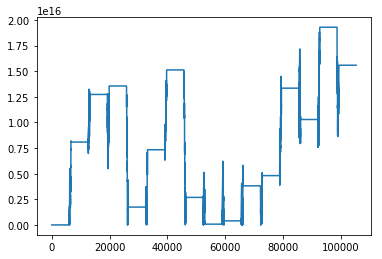

In [18]:
list,labels=time_serie_generation(x0,15)
plt.plot(list)

In [13]:
print(len(list))
print(len(labels))

105390
105390


In [14]:
t = open('/home/alexis/Bureau/stage/Time-series/ake-time-series.txt', 'w',os.O_NONBLOCK)
for item in list:
  t.write("%s\n" % item)


In [16]:
l = open('/home/alexis/Bureau/stage/Time-series/fake-time-series-labels.txt', 'w',os.O_NONBLOCK)
for item in labels:
  l.write("%s\n" % item)